<a href="https://colab.research.google.com/github/DVANH0302/Tensorflow-Certification-Prep/blob/main/01_Neural_Network_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow
There are many definitions for a regression problem built in our case, we are going to simplify it: predicting outcombe based on the combination of variables

In [1]:
import tensorflow as tf

# Creating data to view and fit

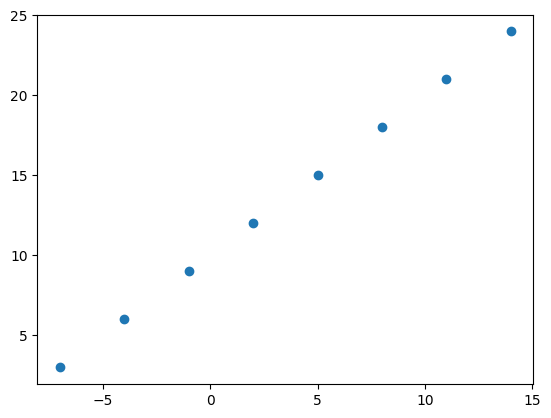

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0, 18.0, 21.0 ,24.0])

# Visualize it
plt.scatter(X,y )

# Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [6]:
# Example input and output shapes of a regression model

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price= tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# Step in modelling with TensorFlow

1. Creating a model - piece together the layers of neural network yourself
2. Compiling the model - defining how a models performance should be measured
3. Fitting a model - letting the model try to find patterns in the data


Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

In [7]:
# Set random seed
tf.random.set_seed(42)

# Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Complie the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
# Fit the model

# model.fit(X,y ,epochs = 5)
model.fit(tf.expand_dims(X,axis =-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 19.1101 - mae: 19.1101
Epoch 2/5
1/1 [==============================] - 0s 28ms/step - loss: 18.8288 - mae: 18.8288
Epoch 3/5
1/1 [==============================] - 0s 28ms/step - loss: 18.5476 - mae: 18.5476
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 18.2663 - mae: 18.2663
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 17.9851 - mae: 17.9851


In [9]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [12]:
model.predict([17])

1/1 [==============================] - 0s 65ms/step


array([[-16.094578]], dtype=float32)

# Improving a model
To improve the model, we alter almost every part of the 3 steps we went through before.

1. Creating a model
- add more layers
- Increase the number of hidden units (neurons) within each layer
- change the activation functions of each layer

2. Compiling the model
- Choose optimization function
- Change learning rate

3. Fitting a model
- More epochs
- More data

In [14]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis = -1), y , epochs =100)

Epoch 1/100
1/1 [==============================] - 1s 536ms/step - loss: 11.7539 - mae: 11.7539
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.6214 - mae: 11.6214
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.4889 - mae: 11.4889
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3564 - mae: 11.3564
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 11.2239 - mae: 11.2239
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 11.0914 - mae: 11.0914
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 10.9589 - mae: 10.9589
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 10.8264 - mae: 10.8264
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 10.6939 - mae: 10.6939
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 10.5614 - mae: 10.5614
Epoch 11/100
1/1 [==============================

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 123ms/step


array([[30.14355]], dtype=float32)

# Evaluating a model
A typical workflow you'll go through when building neural networks is:
- `Build a model -> evaluate it -> build (tweak) a model -> evaluate it -> tweak a model -> ....`

# Evaluation: Visualize, visualize, visualize
It's good idea to visualize:
- The data
- The model itself
- The training of a model
- The prediction of a model

In [17]:
X= np.arange(-100,100, 4)
y = np.arange(-90,110,4)

# Split the data into training and test set
- training set - the model learns from this data (70-80%)
- validation set - the model gets tuned on this data (10-15%)
- test set - the model gets evaluated on this data (10-15%)

In [19]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

# Visualizing the data

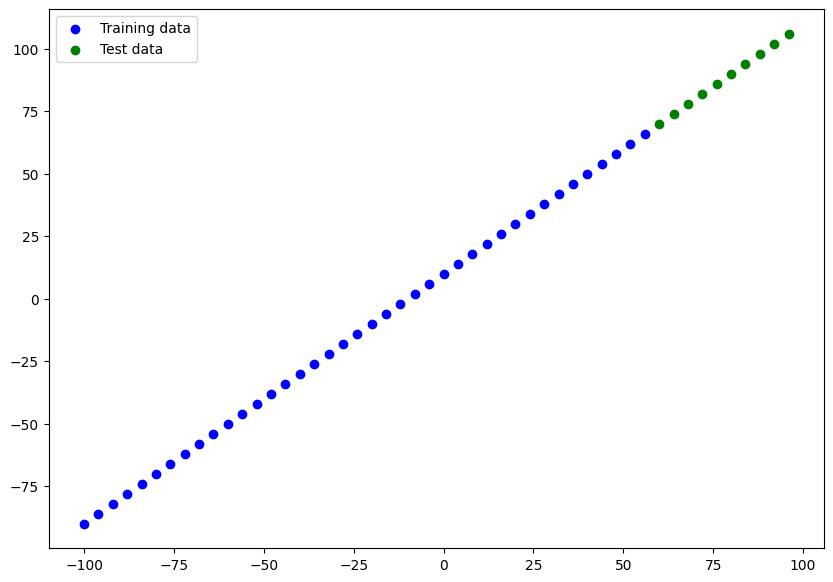

In [20]:
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, c='b', label = 'Training data')
plt.scatter(X_test, y_test, c='g', label = 'Test data')
plt.legend()

# Build the model

In [22]:
tf.random.set_seed(42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
#model.fit(X_train, y_train, epochs = 100)

# Visualizing the model

In [23]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

The cells above errors because we haven't fit or built our model.
We haven't told it what input shape it should be expecting.

We can let our model know the input shapes of our data using the input_shape parameter to the first layr (usually if input_shape isn't defined, Keras tries to figure it out automatically)

In [24]:
tf.random.set_seed(42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

> 🛠 **Exercise:** Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

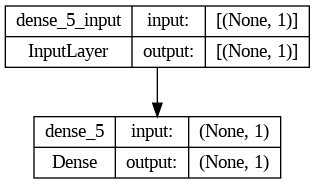

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [26]:
# Fit the model to the traning data
model.fit(X_train, y_train, epochs = 1000, verbose = 0)

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Visualizing the predictions

In [29]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 79ms/step


array([[ 72.955215],
       [ 77.26518 ],
       [ 81.57515 ],
       [ 85.88512 ],
       [ 90.19509 ],
       [ 94.50506 ],
       [ 98.815025],
       [103.12499 ],
       [107.43496 ],
       [111.74493 ]], dtype=float32)

In [30]:
def plot_prediction(X_train, y_train, X_test , y_test,  y_preds):
  plt.figure(figsize= (10,7))

  # plot train
  plt.scatter(X_train, y_train, c= 'b', label = 'training data')

  # plot test
  plt.scatter(X_test, y_test, c = 'r', label = 'test data')

  # plot preds
  plt.scatter(X_test, y_preds, c= 'y', label = 'predictions')


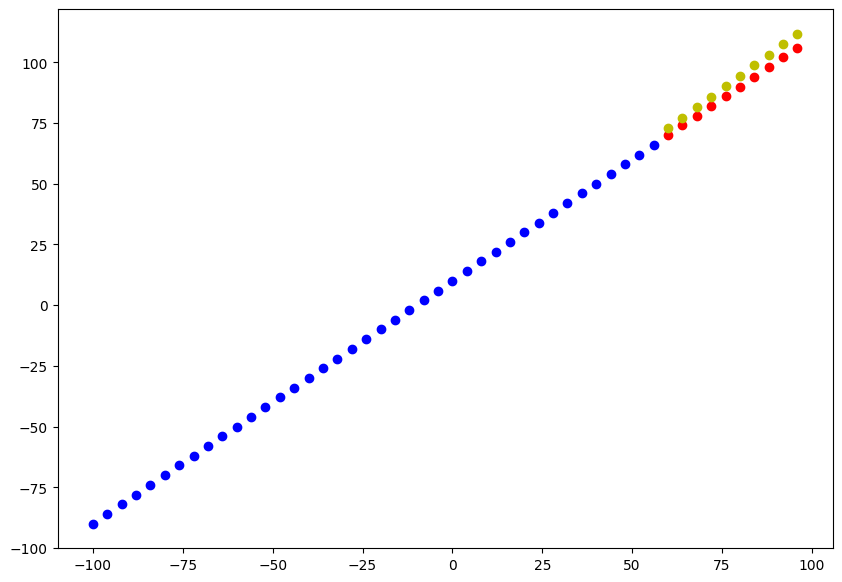

In [32]:
plot_prediction(X_train, y_train, X_test, y_test, y_preds)

# Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [34]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 262ms/step - loss: 4.3501 - mae: 4.3501


[4.350071907043457, 4.350071907043457]

In [36]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds)
mae
# The output is wrong since y_test and y_pred are not on the same shape

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.635828, 12.840891, 10.96994 , 10.022977, 10.039019, 11.002024,
       12.889015, 15.699994, 19.43496 , 23.744926], dtype=float32)>

In [37]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [38]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.350072>

# Running experiment to imporve the models

1. Get more data
2. Make model largere
3. Train for longer

Experiemnt
1. `model_1`: 1 layer, 100 epochs
2. `model_2`: 2 layers, 100 epochs
3. `model_3`: 2 layers , 500 epochs

Build model_1

In [39]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 31.4756 - mae: 31.4756
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 8.2004 - mae: 8.2004
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2762 - mae: 10.2762
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 12.6703 - mae: 12.6703
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7173 - mae: 11.7173
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8291 - mae: 10.8291
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.7510 - mae: 8.7510
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 7.7248 - mae: 7.7248
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 20.0943 - mae: 20.0943
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.6558 - mae: 13.6558
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 80ms/step


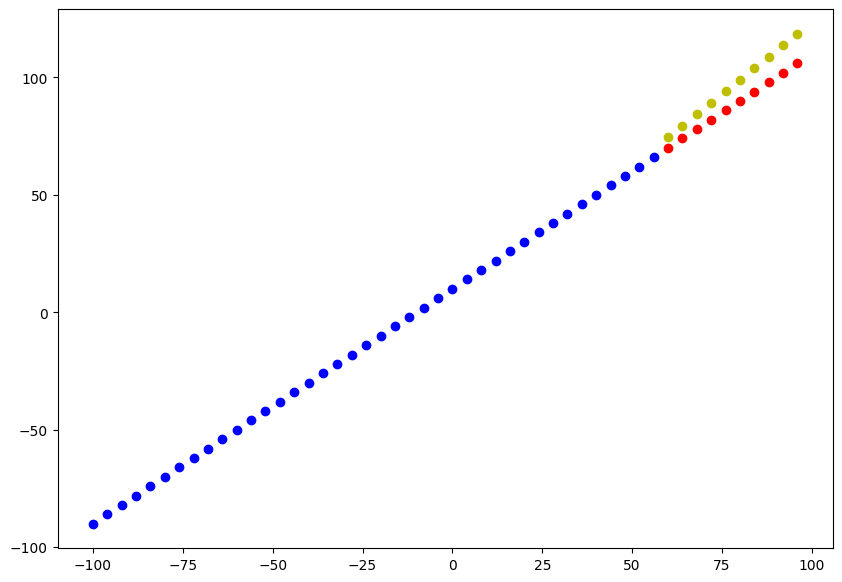

In [40]:
plot_prediction(X_train, y_train, X_test, y_test, model_1.predict(X_test))

Build model_2

In [41]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # new layers
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 12.4606 - mae: 12.4606
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8627 - mae: 11.8627
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 19.2349 - mae: 19.2349
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4942 - mae: 12.4942
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 13.6324 - mae: 13.6324
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9360 - mae: 10.9360
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9067 - mae: 11.9067
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7640 - mae: 10.7640
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 37.0455 - mae: 37.0455
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 24.7879 - mae: 24.7879
Epoch 11/100
2/2 [==============================] - 0s 9m

1/1 [==============================] - 0s 56ms/step


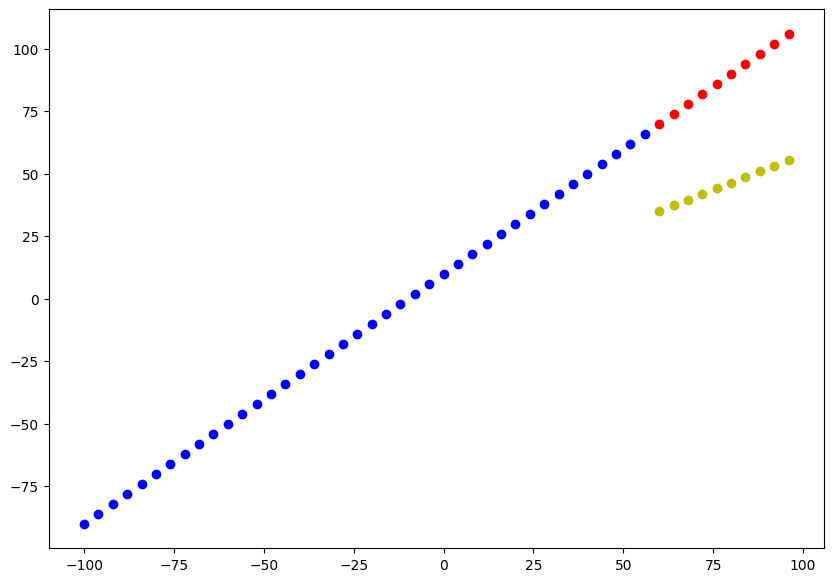

In [42]:
plot_prediction(X_train, y_train, X_test, y_test, model_2.predict(X_test))

Build model_3

In [43]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 14.8101 - mae: 14.8101
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 20.8914 - mae: 20.8914
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8649 - mae: 27.8649
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 23.2269 - mae: 23.2269
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 13.8600 - mae: 13.8600
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.0964 - mae: 11.0964
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.0783 - mae: 12.0783
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.8310 - mae: 10.8310
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 37.5213 - mae: 37.5213
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.1865 - mae: 25.1865
Epoch 11/500
2/2 [==============================] - 0s 8m

1/1 [==============================] - 0s 63ms/step


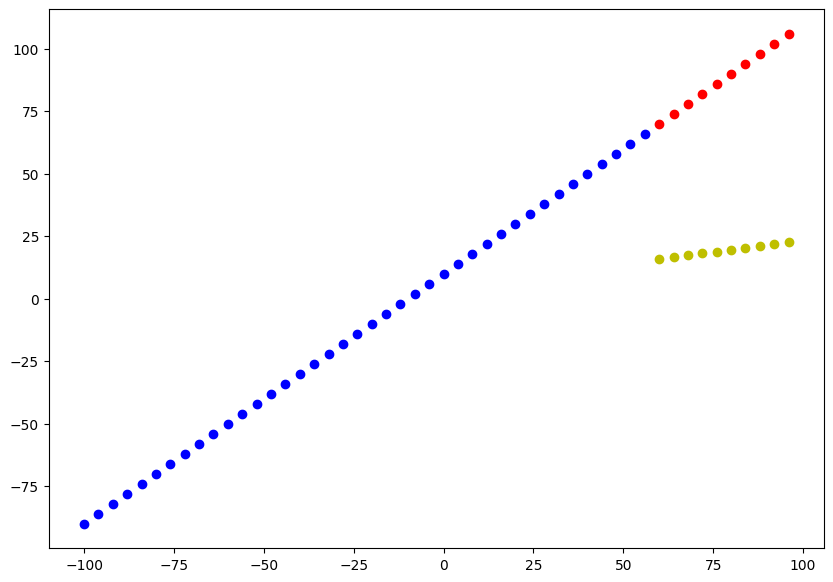

In [44]:
plot_prediction(X_train, y_train, X_test, y_test, model_3.predict(X_test))

# A larger example

In [46]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [48]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [51]:
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [53]:
tf.random.set_seed(42)
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 12951.2734 - mae: 12951.2734
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12106.3984 - mae: 12106.3984
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 11278.8467 - mae: 11278.8467
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 10520.8350 - mae: 10520.8350
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 9870.4199 - mae: 9870.4199
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9320.3877 - mae: 9320.3877
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8845.1992 - mae: 8845.1992
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 8457.5029 - mae: 8457.5029
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8150.9243 - mae: 8150.9243
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7904.0767 - mae: 7

In [56]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [58]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 7000.1738 - mae: 7000.1738


[7000.173828125, 7000.173828125]

In [60]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [64]:
# Rebuild the model
tf.random.set_seed(42)
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

# Fit the model
history = model.fit(X_train, y_train, epochs = 500, verbose = 0)

In [62]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 10ms/step - loss: 3174.6348 - mae: 3174.6348


[3174.634765625, 3174.634765625]

Text(0.5, 0, 'epochs')

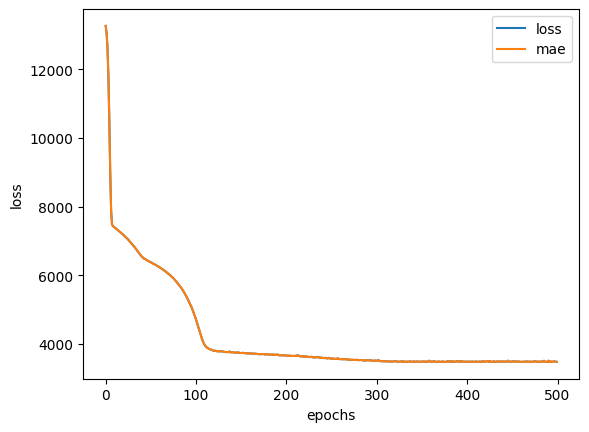

In [67]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Preprocess data
- A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.
This practice is called normalization (scaling all value from original range to be bin

- There is another process called standardization which converts all of your data to unit variance and 0 mean.

- Therefore steps in your data preprocessing includes:
** Turning all of your data to numbers
** Making sure your data is in right shape
** Feature scaling
            

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [72]:
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [75]:
# Rebuild the model
tf.random.set_seed(42)
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

# Fit the model
history = model.fit(X_train_normal, y_train, epochs = 500, verbose = 0)

<Axes: >

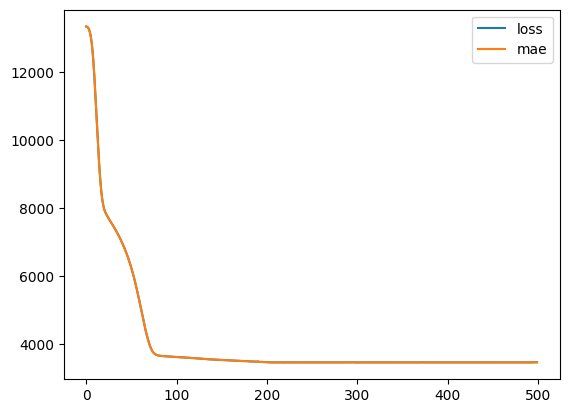

In [78]:
pd.DataFrame(history.history).plot()

In [79]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 10ms/step - loss: 3160.6252 - mae: 3160.6252


[3160.625244140625, 3160.625244140625]